In [1]:
from neuron import h
import os
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))




#First compile our modfiles.
if os.system('nrnivmodl modfiles/') == 0:
    print("Compilation Succeeded.")
else:
    print("Compilation Failed.")


Compilation Succeeded.


In [2]:
h.load_file('stdrun.hoc')

#Define simumulation parameters.
SIMRUNTIME = 1500
DELAY      = 400
INJTIME    = 500
I_INJ      = 0.2

h.tstop    = SIMRUNTIME
h.v_init   = -75

#Now set up vectors to record the membrane potential and the time.
potential = h.Vector()
time      = h.Vector()




In [3]:
import numpy as np

tonic_soma = h.Section(name = 'tonic_soma')

tonic_iclamp = h.IClamp(tonic_soma(0.5))
tonic_iclamp.dur   = INJTIME
tonic_iclamp.amp   = I_INJ
tonic_iclamp.delay = DELAY

#We will make a super simple one compartement tonic spiking cell.
tonic_soma.nseg = 1
tonic_soma.L    = 25
tonic_soma.diam = 24.75

#Now insert the two segregated modules into the cell.
#First insert the passive module.
tonic_soma.insert('leakCA3')
tonic_soma.insert('hdCA3')

#Now insert the spiking module.
tonic_soma.insert('natCA3')
tonic_soma.insert('kdrCA3')

#record time and membrane potential for tonic cell.
#Record the membrane variables.
time.record(h._ref_t) 
potential.record(tonic_soma(0.5)._ref_v)

#Plot membrane potential of tonic cell.
def plot_membrane():
    plt.close()
    plt.figure(figsize = (20,5))
    plt.plot(time, potential)
    plt.xlabel('Time')
    plt.ylabel('Membrane Potential')
    plt.show()

def run_tonic_model(amp, gna, gkdr, gh, mseg, nseg, lseg):
    tonic_iclamp.amp = amp

    tonic_soma.glbar_leakCA3 = 1.53*3e-5
    tonic_soma.gbar_natCA3   = gna
    tonic_soma.mseg_natCA3   = mseg
    tonic_soma.gbar_kdrCA3   = gkdr
    tonic_soma.nseg_kdrCA3   = nseg
    tonic_soma.ghdbar_hdCA3  = gh
    tonic_soma.lseg_hdCA3    = lseg
    
    h.run()

    plot_membrane()

    plot_gating(mseg, nseg, lseg)

#Plot the gating curves.
def plot_gating(mseg, nseg, lseg):
    
    def m_curve(v):
        f = 0
        if(v < mseg):
            f = 0
        else: 
            f = 1.0/ (1.0 + np.exp( (-v - 35.5) / 7.2))
        return f

    def l_curve(v):
        f = 0
        if(v > lseg):
            f = 0
        else:
            f = 1.0/(1.0 + np.exp( (v + 62.4) / 8.0))
        return f
    
    def n_curve(v):
        f = 0
        if(v < nseg):
            f = 0
        else: 
            f = 1.0/(1.0 + np.exp( (0 - v) / 11.0))
        return f

    voltage_domain = np.arange(-80.0, 40.0, 0.1)

    #Now plot all three of the curves.
    plt.close()
    plt.figure(figsize = (20,5))
    plt.plot(voltage_domain, [m_curve(i) for i in voltage_domain], label= 'm_curve')
    plt.plot(voltage_domain, [l_curve(i) for i in voltage_domain], label= 'l_curve')
    plt.plot(voltage_domain, [n_curve(i) for i in voltage_domain], label= 'n_curve')
    plt.xlabel('Voltage')
    plt.ylabel('Probability')
    plt.legend(loc="upper right")
    plt.show()



#Set the default parameters for the simulations.
#
default_tonic = [I_INJ, 0.065, 0.065, 1.0e-5, -52.5, -55, -62.4]

run_tonic_model(default_tonic[0], 
                default_tonic[1],
                default_tonic[2],
                default_tonic[3],
                default_tonic[4],
                default_tonic[5],
                default_tonic[6] )

ValueError: argument not a density mechanism name.

In [19]:
#Create the all in one interactive plot.
import ipywidgets as widgets
from ipywidgets import HBox,VBox,Label,Layout
from IPython.display import display
%matplotlib inline

#Make a list of all widgets.
#Contains: amp slider, g_nat slider, g_kdr slider, g_h slider, m_seg, n_seg, l_seg, .
sliders_tonic = []
sliders_tonic.append(widgets.FloatSlider(value = default_tonic[0], min = 0.1, max = 1.0, step = 0.1, continuous_update=False, readout_format='.1f'))
sliders_tonic.append(widgets.FloatSlider(value = default_tonic[1], min = 0.001, max = 0.36, step = 0.00359, continuous_update=False, readout_format='.1e'))
sliders_tonic.append(widgets.FloatSlider(value = default_tonic[2], min = 6.0e-4, max = 0.18, step = 0.001794, continuous_update=False, readout_format='.1e'))
sliders_tonic.append(widgets.FloatSlider(value = default_tonic[3], min = 1.0e-5, max = 2.3e-4, step = 2.2e-6, continuous_update=False, readout_format='.1e'))
sliders_tonic.append(widgets.FloatSlider(value = default_tonic[4], min =-60, max = -50, step = 0.1, continuous_update=False, readout_format='.1f')) #need to update segregation ranges
sliders_tonic.append(widgets.FloatSlider(value = default_tonic[5], min = -60, max = -50, step = 0.1, continuous_update=False, readout_format='.1f'))
sliders_tonic.append(widgets.FloatSlider(value = default_tonic[6], min = -70, max = -60, step = 0.1, continuous_update=False, readout_format='.1f'))


labels_tonic = []
labels_tonic.append(Label(r'\( I_{inject}\ (nA) \)'))
labels_tonic.append(Label(r'\( g_{NaT}\ (mS/cm^2) \)'))
labels_tonic.append(Label(r'\( g_{Kdr}\ (mS/cm^2) \)'))
labels_tonic.append(Label(r'\( g_{h}\ (mS/cm^2) \)'))
labels_tonic.append(Label(r'\( m_{seg}\ (mV) \)'))
labels_tonic.append(Label(r'\( n_{seg}\ (mv) \)'))
labels_tonic.append(Label(r'\( l_{seg}\ (mv) \)'))

def reset_model_tonic(*args):
    for i in range(7):
        sliders_tonic[i].value = default_tonic[i]


reset = widgets.Button(description='Reset',icon='history',button_style='primary')
reset.on_click(reset_model_tonic)

ui = HBox([VBox(labels_tonic[:3]),
           VBox(sliders_tonic[:3]),
           VBox(labels_tonic[3:7]),
           VBox(sliders_tonic[3:7]),
           reset
          ])



#def run_tonic_model(amp, gna, gkdr, gh, mseg, nseg, lseg):

out = widgets.interactive_output(run_tonic_model, {'amp':sliders_tonic[0],'gna':sliders_tonic[1],'gkdr':sliders_tonic[2],'gh':sliders_tonic[3],'mseg':sliders_tonic[4],'nseg':sliders_tonic[5],'lseg':sliders_tonic[6]})

display(ui,out)

Output()

In [11]:
#Define Cell Morphology.
soma = h.Section(name = 'soma')

soma.nseg = 1
soma.L    = 25
soma.diam = 24.75

dend = []
dend.append(h.Section(name = 'dend0'))
dend.append(h.Section(name = 'dend1'))

dend[0].nseg = 8
dend[0].L    = 270 
dend[0].diam = 3

dend[1].nseg = 1
dend[1].L    = 400
dend[1].diam = 5

#Connect the sections.
dend[0].connect(soma(0))
dend[1].connect(soma(1))

#Define the biophysical parameters.
soma.Ra = dend[0].Ra = dend[1].Ra = 150
soma.cm = dend[0].cm = dend[1].cm = 2.4


In [12]:
#Insert channels into all sections.
#Insert the bursting module.
soma.insert('leakCA3')
soma.insert('natCA3')
soma.insert('kdrCA3')
for d in dend:
    d.insert('leakCA3')
    d.insert('natCA3')
    d.insert('kdrCA3')

#Insert the doublet module.
soma.insert('hdCA3')
soma.insert('nap')
soma.insert('im')
for d in dend:
    d.insert('hdCA3')
    d.insert('nap')
    d.insert('im')

In [13]:
#Set the conductance values.
'''
gnat = 0.065 
ghd  = 1.0e-5 
gkdr = 0.065  
gnap = 0.002 
gim  = 0.007
'''

soma.glbar_leakCA3 = 1.53*3e-5
soma.gbar_natCA3   = 0.065
soma.gbar_nap      = 0.002
soma.gbar_kdrCA3   = 0.065
soma.ghdbar_hdCA3  = 1.0e-5
soma.gbar_im       = 0.007

for d in dend:    
    d.glbar_leakCA3 = 1.53*3e-5
    d.gbar_natCA3   = 0.065
    d.gbar_nap      = 0.002
    d.gbar_kdrCA3   = 0.065
    d.ghdbar_hdCA3  = 1.0e-5
    d.gbar_im       = 0.007

    
#Set the reversal potentials
soma.ena = dend[0].ena = dend[1].ena = 45
soma.ek  = dend[0].ek  = dend[1].ek  = -80 
#soma.ehd = dend[0].ehd = dend[1].ehd = -45


In [14]:
#Set up the current injection.
i_inj = h.IClamp(soma(0.5))
i_inj.amp   = I_INJ
i_inj.dur   = INJTIME
i_inj.delay = DELAY


#Record the membrane variables.
time.record(h._ref_t) 
potential.record(soma(0.5)._ref_v)

#Set up vectors to record currents, gating variables, and tau variables.
#[0,3] -> currents, [4,8] -> gating variables, [9, 13] -> tau
recording_vectors = []
for i in range(14):
    recording_vectors.append(h.Vector())

#Now we have to manually assign each vector to what it is recording.
recording_vectors[0].record(soma(0.5).natCA3._ref_i)
recording_vectors[1].record(soma(0.5).kdrCA3._ref_i)
recording_vectors[2].record(soma(0.5).nap._ref_i)
recording_vectors[3].record(soma(0.5).im._ref_i)

recording_vectors[4].record(soma(0.5).natCA3._ref_minf)
recording_vectors[5].record(soma(0.5).natCA3._ref_hinf)
recording_vectors[6].record(soma(0.5).kdrCA3._ref_ninf)
recording_vectors[7].record(soma(0.5).nap._ref_minf)
recording_vectors[8].record(soma(0.5).im._ref_ninf)

recording_vectors[9].record(soma(0.5).natCA3._ref_mtau)
recording_vectors[10].record(soma(0.5).natCA3._ref_htau)
recording_vectors[11].record(soma(0.5).kdrCA3._ref_taun)
recording_vectors[12].record(soma(0.5).nap._ref_mtau)
recording_vectors[13].record(soma(0.5).im._ref_taun)

#Run the experiment.
h.run()

0.0

In [8]:
plot_membrane()

NameError: name 'plot_membrane' is not defined

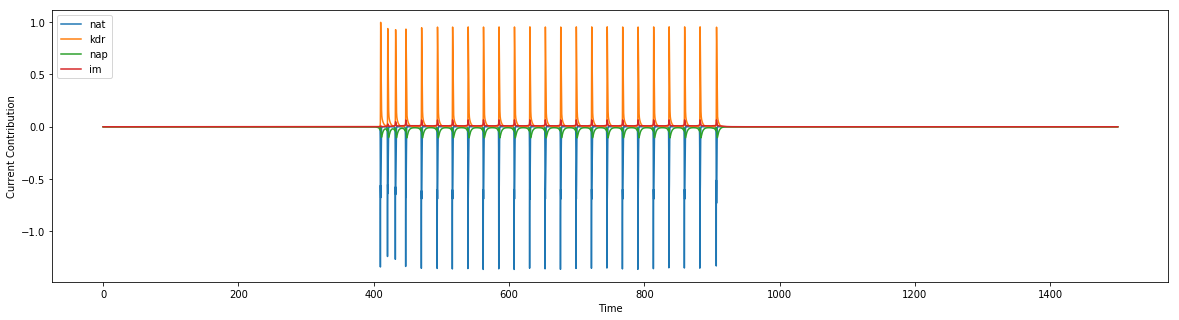

In [16]:
#Plot currents.
def plot_currents():
    plt.close()
    plt.figure(figsize = (20,5))
    
    labels = ['nat', 'kdr', 'nap', 'im']
    
    for i in range(4):
        plt.plot(time, recording_vectors[i], label = labels[i])
    
    plt.legend(loc="upper left")
    plt.xlabel('Time')
    plt.ylabel('Current Contribution')
    plt.show()
    
plot_currents()

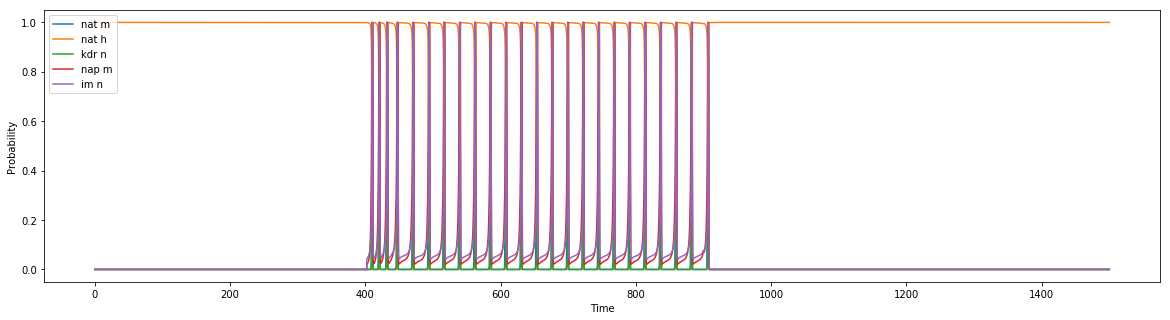

In [17]:
#Plot gating variables.
def plot_gating():
    plt.close()
    plt.figure(figsize = (20,5))
    
    labels = ['nat m', 'nat h', 'kdr n', 'nap m', 'im n']
    
    for i in range(4, 9):
        plt.plot(time, recording_vectors[i], label = labels[i - 4])
    
    plt.legend(loc="upper left")
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.show()
    
plot_gating()

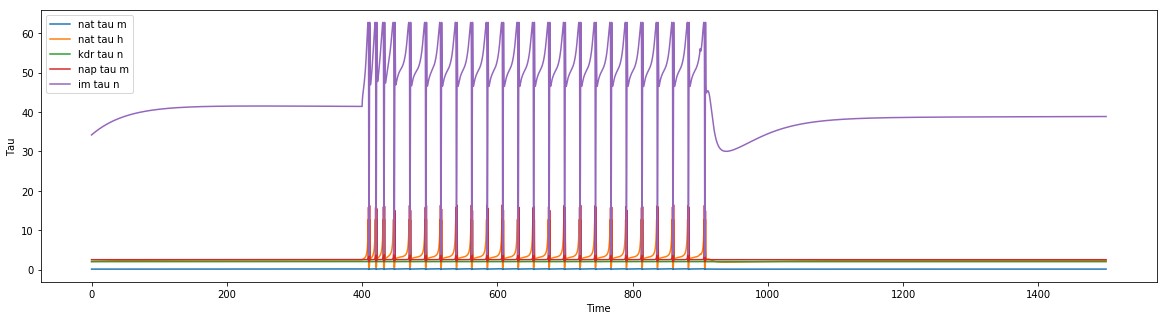

In [18]:
#Plot tau variables.
def plot_tau():
    plt.close()
    plt.figure(figsize = (20,5))
    
    labels = ['nat tau m', 'nat tau h', 'kdr tau n', 'nap tau m', 'im tau n']
    
    for i in range(9, 14):
        plt.plot(time, recording_vectors[i], label = labels[i - 9])
    
    plt.legend(loc="upper left")
    plt.xlabel('Time')
    plt.ylabel('Tau')
    plt.show()
    
plot_tau()

In [19]:


default = [0.2, 1.0e-5, 0.065, 0.065, 0.002, 0.007]

def run_model(amp, ghd, gnat, gkdr, gnap, gim):
    soma.glbar_leakCA3 = 1.53*3e-5
    soma.gbar_natCA3   = gnat
    soma.gbar_nap      = gnap
    soma.gbar_kdrCA3   = gkdr
    soma.ghdbar_hdCA3  = ghd
    soma.gbar_im       = gim

    for d in dend:    
        d.glbar_leakCA3 = 1.53*3e-5
        d.gbar_natCA3   = gnat
        d.gbar_nap      = gnap
        d.gbar_kdrCA3   = gkdr
        d.ghdbar_hdCA3  = ghd
        d.gbar_im       = gim
    
    i_inj.amp = amp
    
    h.run()
    plot_membrane()
    plot_currents()
    plot_gating()
    plot_tau()
    

    
#run_model(0.2, 1.0e-5, 0.065, 0.065, 0.002, 0.007)

#Make a list of all widgets.
#Contains: amp slider, g_h slider, g_nat slider, g_kdr slider, g_nap slider, g_im slider.
sliders = []
sliders.append(widgets.FloatSlider(value = default[0], min = 0.1, max = 1.0, step = 0.1, continuous_update=False, readout_format='.1f'))
sliders.append(widgets.FloatSlider(value = default[1], min = 1.0e-5, max = 2.3e-4, step = 2.2e-6, continuous_update=False, readout_format='.1e'))
sliders.append(widgets.FloatSlider(value = default[2], min = 0.001, max = 0.36, step = 0.00359, continuous_update=False, readout_format='.1e'))
sliders.append(widgets.FloatSlider(value = default[3], min = 6.0e-4, max = 0.18, step = 0.001794, continuous_update=False, readout_format='.1e'))
sliders.append(widgets.FloatSlider(value = default[4], min = 1.0e-5, max = 0.005, step = 4.99e-5, continuous_update=False, readout_format='.1e'))
sliders.append(widgets.FloatSlider(value = default[5], min = 5.0e-6, max = 0.017, step = 1.6995e-4, continuous_update=False, readout_format='.1e'))

labels = []
labels.append(Label(r'\( I_{inject}\ (nA) \)'))
labels.append(Label(r'\( g_{h}\ (mS/cm^2) \)'))
labels.append(Label(r'\( g_{NaT}\ (mS/cm^2) \)'))
labels.append(Label(r'\( g_{Kdr}\ (mS/cm^2) \)'))
labels.append(Label(r'\( g_{NaP}\ (mS/cm^2) \)'))
labels.append(Label(r'\( g_{Km}\ (mS/cm^2) \)'))

def reset_model(*args):
    for i in range(6):
        sliders[i].value = default[i]


reset = widgets.Button(description='Reset',icon='history',button_style='primary')
reset.on_click(reset_model)

ui = HBox([VBox(labels[:3]),
           VBox(sliders[:3]),
           VBox(labels[3:6]),
           VBox(sliders[3:6]),
           reset
          ])



out = widgets.interactive_output(run_model, {'amp':sliders[0],'ghd':sliders[1],'gnat':sliders[2],'gkdr':sliders[3],'gnap':sliders[4],'gim':sliders[5]})

display(ui,out)

Output()